In [1]:
# importing modules
import numpy             as np
import pandas            as pd
import seaborn           as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [2]:
# importing data
df = pd.read_csv("../input/cardiovascular-study-dataset-predict-heart-disea/train.csv")
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [3]:
[col for col in df.columns]

['id',
 'age',
 'education',
 'sex',
 'is_smoking',
 'cigsPerDay',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose',
 'TenYearCHD']

In [4]:
df = df.drop(["id","TenYearCHD"],axis = 1)

In [5]:
df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0


In [6]:
df.isnull().sum()

age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
dtype: int64

In [7]:
df = df.dropna()
df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0
5,61,3.0,F,NO,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,2927.0,49.507345,8.597191,32.00,42.00,49.00,56.00,70.0
education,2927.0,1.965494,1.017199,1.00,1.00,2.00,3.00,4.0
cigsPerDay,2927.0,9.112743,11.882784,0.00,0.00,0.00,20.00,70.0
BPMeds,2927.0,0.030065,0.170795,0.00,0.00,0.00,0.00,1.0
prevalentStroke,2927.0,0.006150,0.078192,0.00,0.00,0.00,0.00,1.0
prevalentHyp,2927.0,0.314315,0.464322,0.00,0.00,0.00,1.00,1.0
diabetes,2927.0,0.026990,0.162082,0.00,0.00,0.00,0.00,1.0
totChol,2927.0,237.129142,44.613282,113.00,206.00,234.00,264.00,600.0
sysBP,2927.0,132.626409,22.326197,83.50,117.00,128.50,144.00,295.0
diaBP,2927.0,82.906218,12.078873,48.00,74.50,82.00,90.00,142.5


In [9]:
## deleting the obvious 
df = df.drop(["BPMeds","prevalentHyp","sysBP"],axis = 1)
df.head()

## this 3 properties is a clear indication that person has distolic blood pressure
## we are predicting the diastolic blood pressure so we drop it
## then we got only one column left in our data frame that is disBP
## so we can fairly predict it

,age,education,sex,is_smoking,cigsPerDay,prevalentStroke,diabetes,totChol,diaBP,BMI,heartRate,glucose
1,36,4.0,M,NO,0.0,0,0,212.0,98.0,29.77,72.0,75.0
2,46,1.0,F,YES,10.0,0,0,250.0,71.0,20.35,88.0,94.0
3,50,1.0,M,YES,20.0,0,0,233.0,88.0,28.26,68.0,94.0
4,64,1.0,F,YES,30.0,0,0,241.0,85.0,26.42,70.0,77.0
5,61,3.0,F,NO,0.0,0,0,272.0,121.0,32.80,85.0,65.0


In [10]:
d = {"YES":1,"NO":0}
df['is_smoking']= df['is_smoking'].map(d)

In [11]:
df.head()

,age,education,sex,is_smoking,cigsPerDay,prevalentStroke,diabetes,totChol,diaBP,BMI,heartRate,glucose
1,36,4.0,M,0,0.0,0,0,212.0,98.0,29.77,72.0,75.0
2,46,1.0,F,1,10.0,0,0,250.0,71.0,20.35,88.0,94.0
3,50,1.0,M,1,20.0,0,0,233.0,88.0,28.26,68.0,94.0
4,64,1.0,F,1,30.0,0,0,241.0,85.0,26.42,70.0,77.0
5,61,3.0,F,0,0.0,0,0,272.0,121.0,32.80,85.0,65.0


In [12]:
d={"M":1,"F":0}
df['sex'] = df['sex'].map(d)

In [13]:
df.head()

,age,education,sex,is_smoking,cigsPerDay,prevalentStroke,diabetes,totChol,diaBP,BMI,heartRate,glucose
1,36,4.0,1,0,0.0,0,0,212.0,98.0,29.77,72.0,75.0
2,46,1.0,0,1,10.0,0,0,250.0,71.0,20.35,88.0,94.0
3,50,1.0,1,1,20.0,0,0,233.0,88.0,28.26,68.0,94.0
4,64,1.0,0,1,30.0,0,0,241.0,85.0,26.42,70.0,77.0
5,61,3.0,0,0,0.0,0,0,272.0,121.0,32.80,85.0,65.0


<AxesSubplot:>

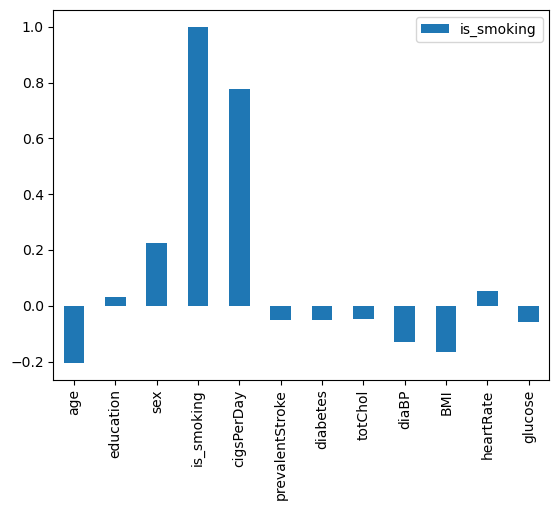

In [14]:
df.corr()[["is_smoking"]].plot(kind="bar")

In [15]:
corr_data = df.corr()

<AxesSubplot:>

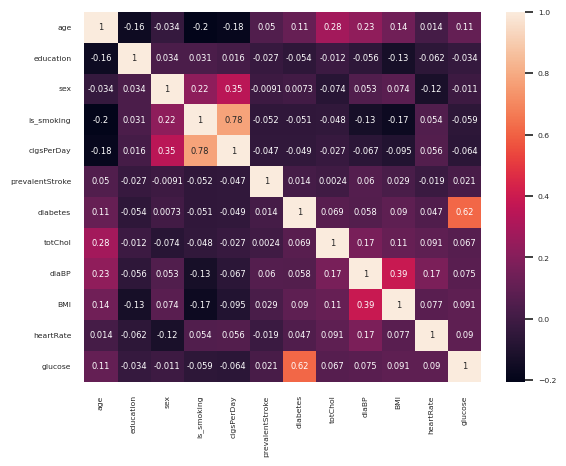

In [16]:
sns.set(font_scale=.5)
sns.heatmap(corr_data,annot=True)

<AxesSubplot:xlabel='is_smoking', ylabel='diaBP'>

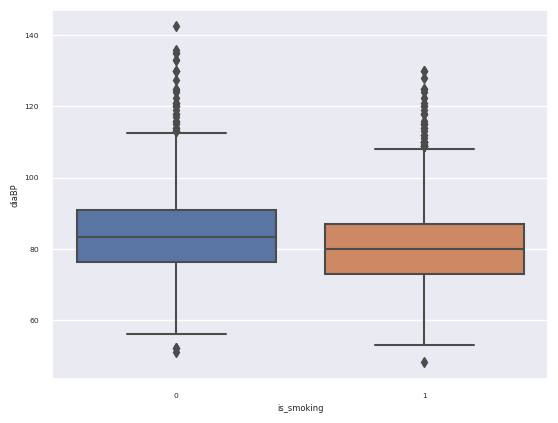

In [17]:
sns.boxplot(x="is_smoking",y="diaBP",data=df)

<AxesSubplot:xlabel='diabetes', ylabel='diaBP'>

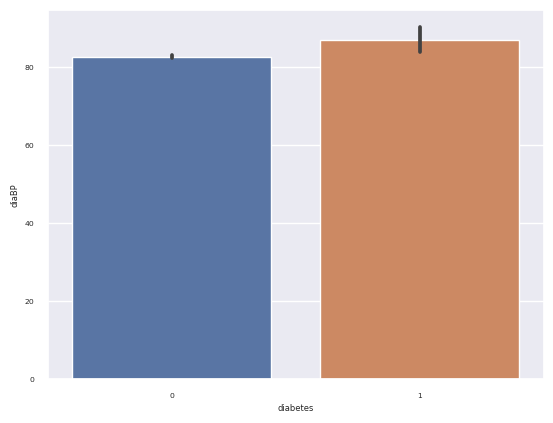

In [18]:
sns.barplot(x="diabetes",y="diaBP",data=df)

In [19]:
df.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay',
       'prevalentStroke', 'diabetes', 'totChol', 'diaBP', 'BMI', 'heartRate',
       'glucose'],
      dtype='object')

<AxesSubplot:xlabel='prevalentStroke', ylabel='diaBP'>

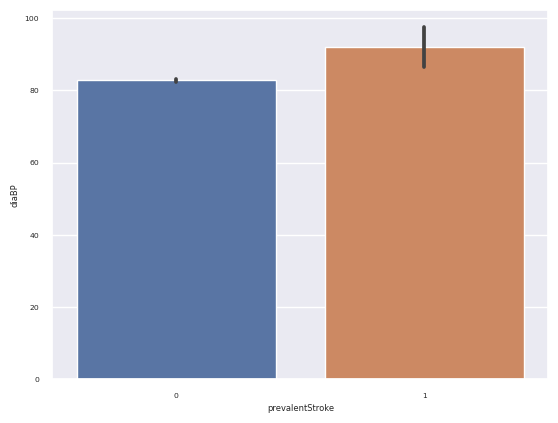

In [20]:
sns.barplot(x="prevalentStroke",y="diaBP",data=df)

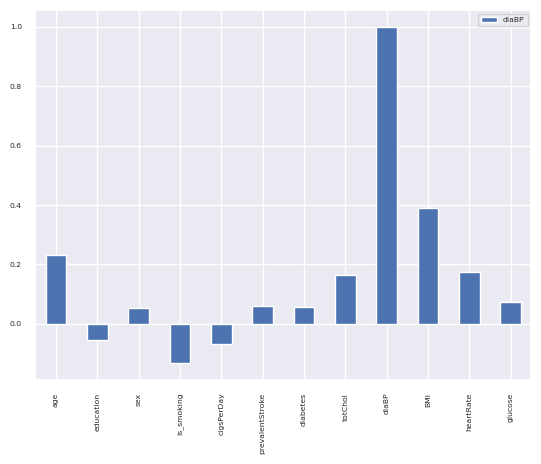

In [21]:
df.corr()[["diaBP"]].plot(kind='bar')
plt.legend()

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model    import LinearRegression
from sklearn.neighbors       import KNeighborsRegressor
from sklearn.svm             import SVR
from sklearn.ensemble        import RandomForestRegressor

In [23]:
df.head(2)

,age,education,sex,is_smoking,cigsPerDay,prevalentStroke,diabetes,totChol,diaBP,BMI,heartRate,glucose
1,36,4.0,1,0,0.0,0,0,212.0,98.0,29.77,72.0,75.0
2,46,1.0,0,1,10.0,0,0,250.0,71.0,20.35,88.0,94.0


In [24]:
def min_max_normalize(column_name):
    return (df[column_name]-df[column_name].min())/(df[column_name].max()-df[column_name].min())
    

In [25]:
df['age'] = min_max_normalize("age")
df['cigsPerDay'] = min_max_normalize("cigsPerDay")
df['totChol'] = min_max_normalize("totChol")
df['BMI'] = min_max_normalize("BMI")
df['heartRate'] = min_max_normalize("heartRate")
df['glucose'] = min_max_normalize("glucose")

In [26]:
df.head()

,age,education,sex,is_smoking,cigsPerDay,prevalentStroke,diabetes,totChol,diaBP,BMI,heartRate,glucose
1,0.105263,4.0,1,0,0.000000,0,0,0.203285,98.0,0.338149,0.275510,0.098870
2,0.368421,1.0,0,1,0.142857,0,0,0.281314,71.0,0.107493,0.438776,0.152542
3,0.473684,1.0,1,1,0.285714,0,0,0.246407,88.0,0.301175,0.234694,0.152542
4,0.842105,1.0,0,1,0.428571,0,0,0.262834,85.0,0.256121,0.255102,0.104520
5,0.763158,3.0,0,0,0.000000,0,0,0.326489,121.0,0.412341,0.408163,0.070621


In [29]:
X = df.drop("diaBP",axis=1)
Y = df[["diaBP"]]
x_train,x_test,y_train,y_test = train_test_split(X,Y,shuffle=True)

In [30]:
x_train.head()

,age,education,sex,is_smoking,cigsPerDay,prevalentStroke,diabetes,totChol,BMI,heartRate,glucose
1264,0.421053,2.0,0,0,0.000000,0,0,0.242300,0.233105,0.459184,0.104520
2929,0.552632,1.0,0,0,0.000000,0,0,0.390144,0.278893,0.153061,0.104520
2566,0.763158,1.0,1,0,0.000000,0,1,0.215606,0.316601,0.306122,0.516949
1277,0.210526,3.0,1,0,0.000000,0,0,0.205339,0.262488,0.244898,0.152542
268,0.263158,2.0,1,1,0.285714,0,0,0.225873,0.186092,0.255102,0.093220


In [31]:
x_test.head()

,age,education,sex,is_smoking,cigsPerDay,prevalentStroke,diabetes,totChol,BMI,heartRate,glucose
427,0.868421,4.0,1,0,0.000000,0,0,0.287474,0.199804,0.153061,0.081921
287,0.710526,1.0,0,1,0.142857,0,0,0.408624,0.584231,0.765306,0.127119
2573,0.578947,1.0,0,0,0.000000,0,0,0.388090,0.329089,0.306122,0.098870
66,0.736842,2.0,1,1,0.285714,0,0,0.301848,0.212047,0.275510,0.110169
1649,0.394737,2.0,0,0,0.000000,0,0,0.225873,0.105534,0.357143,0.101695


In [32]:
y_train.head()

,diaBP
1264,69.0
2929,91.0
2566,96.0
1277,83.0
268,87.0


In [33]:
y_test.head()

,diaBP
427,60.0
287,82.0
2573,94.0
66,103.0
1649,74.0


In [41]:
model = [LinearRegression(),KNeighborsRegressor(),SVR(),RandomForestRegressor()]

In [42]:
for m in model:
    model = m
    model.fit(x_train,y_train)
    print(model.score(x_test,y_test))
    

0.25584837531538107
0.07682827781583734


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.13390672043097807


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.19380500459003902
